# Evolutionary algorithms in optimisation

In [1]:
# Load libraries required

import numpy as np
import random 

In [1]:
"""Calculate distance between two genomes

    Args:
      word1: master genome
      word2: mutated genome

    Returns:
      A number that calculates distance between two genome, minimum 0, maximum 21

"""

# for each letter in the first word, 
# if the letter is not the same as that letter in the second word, 
# then increase the distance by 1


def distWord(word1, word2):
    distance = 0
    for i in range(0, len(word1)):
        if word1[i] != word2[i]:
            distance += 1
    return distance



In [7]:
v = ['runt', 'hunt', 'hung', 'bind', 'sind', 'rung', 'band', 'sand']

for i in v:
    print(i)
    print(i+1)

runt


TypeError: can only concatenate str (not "int") to str

In [3]:
"""
Setting the master sequence
"""

master = "GATACCAATTACCAGATACCA"

In [4]:
"""Populate starting sequence 
   Formed by random sequences of length in the letters A, C, G, T
    
   Args:
      genomelength: Constant number 21
      letters: List of letters A, C, G, T

    Returns:
      A string of 21 random sequences consisted of letters A, C, G, T

"""

# Initialise the first genome

letters  = ['A', 'C', 'T', 'G']
pops = []

seq = 10
genomelength = 21

# Generates genomelength string of chars in letters

def createRandomGenome(genomelength,letters):
    genome = ''
    for i in range(genomelength):
        genome=genome + random.choice(letters)
    return genome


In [5]:
"""Generate and display starting sequence of 21 random sequence 10 times
    
    Args:
      seq: Number of genomes of 21 random sequence

    Returns:
      A list of 10 genomes
"""


print("Creating starting sequence:")

for i in range(seq):
    g = [] 
    g = createRandomGenome(genomelength ,letters)
    pop = [g, len(master)-distWord(master,g)]
    pops.append(pop)

pops

Creating starting sequence:


[['CTTGTTCTATTTTTCCGCGGA', 3],
 ['TATAGATATTTCCGTGTATTA', 11],
 ['GAAACATAAACGTGGATGCAC', 9],
 ['ACCTACGTAATAAATCGCTTG', 2],
 ['TTTGTTGGAATAGGCCGCTAC', 1],
 ['AACTCTGGAAGTCTCGCCCGG', 4],
 ['TGCCTTGATTTGTCTACCCGC', 5],
 ['ATAATGGGCCAATATTGTCTG', 4],
 ['ACGAATTCGATGGCTAGAAGC', 3],
 ['TCTAAACATTGTCCCCTCGTG', 7]]

In [6]:
"""Select the genome with the smallest distance to the master sequence

    Args:
      pops: List of genomes

    Returns:
      A list of the smallest genome sequence and its distance from the master sequence

"""

# reutrn the most similar genome to master, similar characters
def selectMostSimilar(pops):
    selection_list = sorted(pops, key=lambda x: x[1],reverse=True)
    best = selection_list[0]
    return best 

In [7]:
"""Call selectMostSimilar function, assign the output to an object called parent and display
"""

parent = selectMostSimilar(pops)
parent

['TATAGATATTTCCGTGTATTA', 11]

In [8]:
"""Produce offspring and mutate with mutate rate as per offspring probability
    
   Args:
      parent: 

    Returns:
      A list

"""

offspring_probability = 10

# 10 times, go through parent genome, change 1 in 10 characters, and add that to a list. 
# Return the list. 

def createOffspring(parent):
    
    offspring = [] # list of offspring to be mutated
    
    for i in range(genomelength):
        offspring_genome = '' 
    
        for char in str(parent[0]): 
            if random.randint(1,100) <= offspring_probability : 
                offspring_genome = offspring_genome + random.choice(letters) 
            else:  
                offspring_genome = offspring_genome + char 

        offspring.append(offspring_genome, )
      
    return offspring

In [9]:
"""Generate and display 21 random sequence offsprings 10 times
"""

offspring = createOffspring(parent)
offspring 

['TACAGGTATTTCCGTGTATTA',
 'TATAGATATTCCCGTTTATTA',
 'TATAGATATTTACGTGTTTTA',
 'AATCGATATTTCGCTGTATTA',
 'TATAGATATTTCCGTGTATTA',
 'CATATACATTTCCGTGGATTA',
 'TATAGATATTTGCGTGTATTA',
 'TACAGATGTTTCCGTGTATTG',
 'TATAGATATTTCCGTGGATTG',
 'TAGAGATATTTCCGTGTATTA',
 'TATAGATAGTCCCGTGCATTA',
 'TATAGATATTTCCGTGTATTA',
 'TATAGATATTTCCGTGTATTA',
 'TATAGATTTTTCGCTGTATTA',
 'TATAGATATTTCCGTGTATTA',
 'TATAGATATTTCCGTGAATTA',
 'TATAGAAACTTCCGTGAATTA',
 'TCTAGACATTTCCGCGTATTA',
 'TGTAGATATTTCCGTGTATGA',
 'TATAGAGATTTCCGTGTATTA',
 'TATATATATTTCCGTGTGTTA']

In [10]:
'''
Step 4: Mutate, Calculate and Select fittest

'''

# returns the most similar genome from a list of 10 offspring genomes with similarity numbers
def getBestChild(parent):
    mutated_list = []
    # create children from offspring
    children = createOffspring(parent)
    # mutate children
    for c in children:
        mutated = [c, len(master)-distWord(master,c)]
        mutated_list.append(mutated)
    
    best = selectMostSimilar(mutated_list)
    return best


In [11]:
# use children(parent) to mutate
best = getBestChild(parent)
best

['TATAGCTATTTCCGAGTATTA', 12]

In [12]:
parent

['TATAGATATTTCCGTGTATTA', 11]

In [13]:
# take parent, generate offspring from parent, 
# choose best offspring, and choose between best offspring and parent for next generation
def runGeneration(parent):
    best_child = getBestChild(parent)
    
    if best_child[1] > parent[1]:
        fittest = best_child
    else:
        fittest = parent
    
    return fittest
    

In [14]:
fittest = parent

progress_g = []
progress_f = []

g = 0
while fittest[1] !=21:
    new_fittest = runGeneration(fittest)
    fittest = new_fittest
    g +=1
    progress_g.append(g)
    progress_f.append(fittest[1])
    # print(fittest)
    print("Fittest: ", fittest, "Generation: ", g)

print("Master sequence has been achieved")
print("Probability ", offspring_probability, "in 100")
print("Number of offspring ", genomelength)
print("Number of generations ", g)

    

Fittest:  ['TATACATATTTCCGTGTATTA', 12] Generation:  1
Fittest:  ['TATATATATTTCCGGGTACCA', 14] Generation:  2
Fittest:  ['TTTACATATTACCGGGTACCA', 15] Generation:  3
Fittest:  ['TTTACATATTACCGGGTACCA', 15] Generation:  4
Fittest:  ['TTTATCTATTACCAGGTACCA', 16] Generation:  5
Fittest:  ['TTTATCTATTACCAGATACCA', 17] Generation:  6
Fittest:  ['TTTATCTATTACCAGATACCA', 17] Generation:  7
Fittest:  ['TTTATCTATTACCAGATACCA', 17] Generation:  8
Fittest:  ['TTTATCTATTACCAGATACCA', 17] Generation:  9
Fittest:  ['GTTATCTATTACCAGATACCA', 18] Generation:  10
Fittest:  ['GTTATCTATTACCAGATACCA', 18] Generation:  11
Fittest:  ['GATATCTATTACCAGATACCA', 19] Generation:  12
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  13
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  14
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  15
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  16
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  17
Fittest:  ['GATACCCATTACCAGATACCA', 20] Generation:  18
F

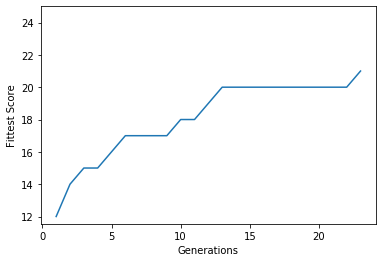

In [16]:
# Plot progress
import matplotlib.pyplot as plt

x = np.array(progress_g)
y = np.array(progress_f)

plt.plot(x, y)
plt.xlabel('Generations')
plt.ylim(top=25)
plt.ylabel('Fittest Score')
plt.show()